## Import necessary libraries

In [11]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Extract csv file

In [12]:
data = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


## EXPLAINED IN PREVIOUS NOTEBOOKS
#### To obtain `NumData` and `NumDataCleaned`

In [13]:
NumData = pd.DataFrame(data[['floor_area_sqm', 'lease_commence_date','resale_price']])
NumDataCleaned = data[['floor_area_sqm', 'resale_price', 'lease_commence_date']].copy()

# Calculate the quartiles
Q1 = NumDataCleaned.quantile(0.25)
Q3 = NumDataCleaned.quantile(0.75)

# Rule to identify outliers
rule = ((NumDataCleaned < (Q1 - 1.5 * (Q3 - Q1))) | (NumDataCleaned > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]

# Remove the outliers based on the row indices obtained above
NumDataCleaned.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
NumDataCleaned

,floor_area_sqm,resale_price,lease_commence_date
0,69.0,147000.0,1986
1,61.0,144000.0,1986
2,73.0,159000.0,1976
3,73.0,167000.0,1976
4,67.0,163000.0,1976
...,...,...,...
369644,121.0,465000.0,1985
369645,121.0,503000.0,1985
369646,121.0,476888.0,1985
369647,122.0,490000.0,1986


In [14]:
NumDataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363711 entries, 0 to 369648
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   floor_area_sqm       363711 non-null  float64
 1   resale_price         363711 non-null  float64
 2   lease_commence_date  363711 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 11.1 MB


#### To obtain `CatData` and `CatDataCleaned`

In [15]:
flat_type = pd.DataFrame(data[['flat_type']])
mapping = {'1 ROOM': 1, '2 ROOM': 2, '3 ROOM': 3, '4 ROOM': 4, '5 ROOM': 5, 'EXECUTIVE': 6, 'MULTI-GENERATION': 7}
data['flat_type_num'] = flat_type['flat_type'].map(mapping)

storey_range = pd.DataFrame(data[['storey_range']])
mapping = {'01 TO 03': 2, '04 TO 06': 5, '07 TO 09': 8, '10 TO 12': 11, '13 TO 15': 14, '16 TO 18': 17, '19 TO 21': 20, '22 TO 24': 23, '25 TO 27': 26, '28 TO 30': 29, '31 TO 33': 32, '34 TO 36': 35, '37 TO 39': 38, '40 TO 42': 41}
data['Story_range_num'] = storey_range["storey_range"].map(mapping)

flat_model = pd.DataFrame(data[['flat_model']])
mapping = {'2-room': 1, 'Adjoined flat': 2, 'Apartment': 3, 'Improved': 4, 'Improved-Maisonette': 5, 'Maisonette': 6, 'Model A': 7, 'Model A-Maisonette': 8, 'Model A2': 9, 'Multi Generation': 10, 'New Generation': 11, 'Premium Apartment': 12, 'Premium Maisonette': 13, 'Simplified': 14, 'Standard': 15, 'Terrace': 16}
data['flat_model_num'] = flat_model['flat_model'].map(mapping)

CatData = pd.DataFrame(data[['flat_type_num', 'Story_range_num','flat_model_num','resale_price']])
CatDataCleaned = CatData[['flat_type_num', 'Story_range_num', 'flat_model_num','resale_price']].copy()
# Make a clean "copy" and not just a slice of the dataset

# Calculate the quartiles
Q1 = CatDataCleaned.quantile(0.25)
Q3 = CatDataCleaned.quantile(0.75)

# Rule to identify outliers
rule = ((CatDataCleaned < (Q1 - 1.5 * (Q3 - Q1))) | (CatDataCleaned > (Q3 + 1.5 * (Q3 - Q1))))

outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]



# Remove the outliers based on the row indices obtained above
CatDataCleaned.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
CatDataCleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 360927 entries, 0 to 369648
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flat_type_num    360927 non-null  int64  
 1   Story_range_num  360927 non-null  int64  
 2   flat_model_num   360927 non-null  int64  
 3   resale_price     360927 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 13.8 MB


## Helper function for Linear Regression

**Reasons for Linear Regression** <br>

Linear Regression because it is the most basic way to summarize the relationship between variables<br>
To provide basic insights on relationship of each predictors and `resale_price`

In [16]:
def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

## REGRESSION FOR NUMERICAL DATA

## CASE 1 `BEFORE` AND `AFTER` REMOVAL OF OUTLIERS FOR `floor_area_sqm` and `resale_price`

## Before removal of outliers

Intercept 	: b =  [-10928.82614501]
Coefficients 	: a =  [[3026.13798786]]


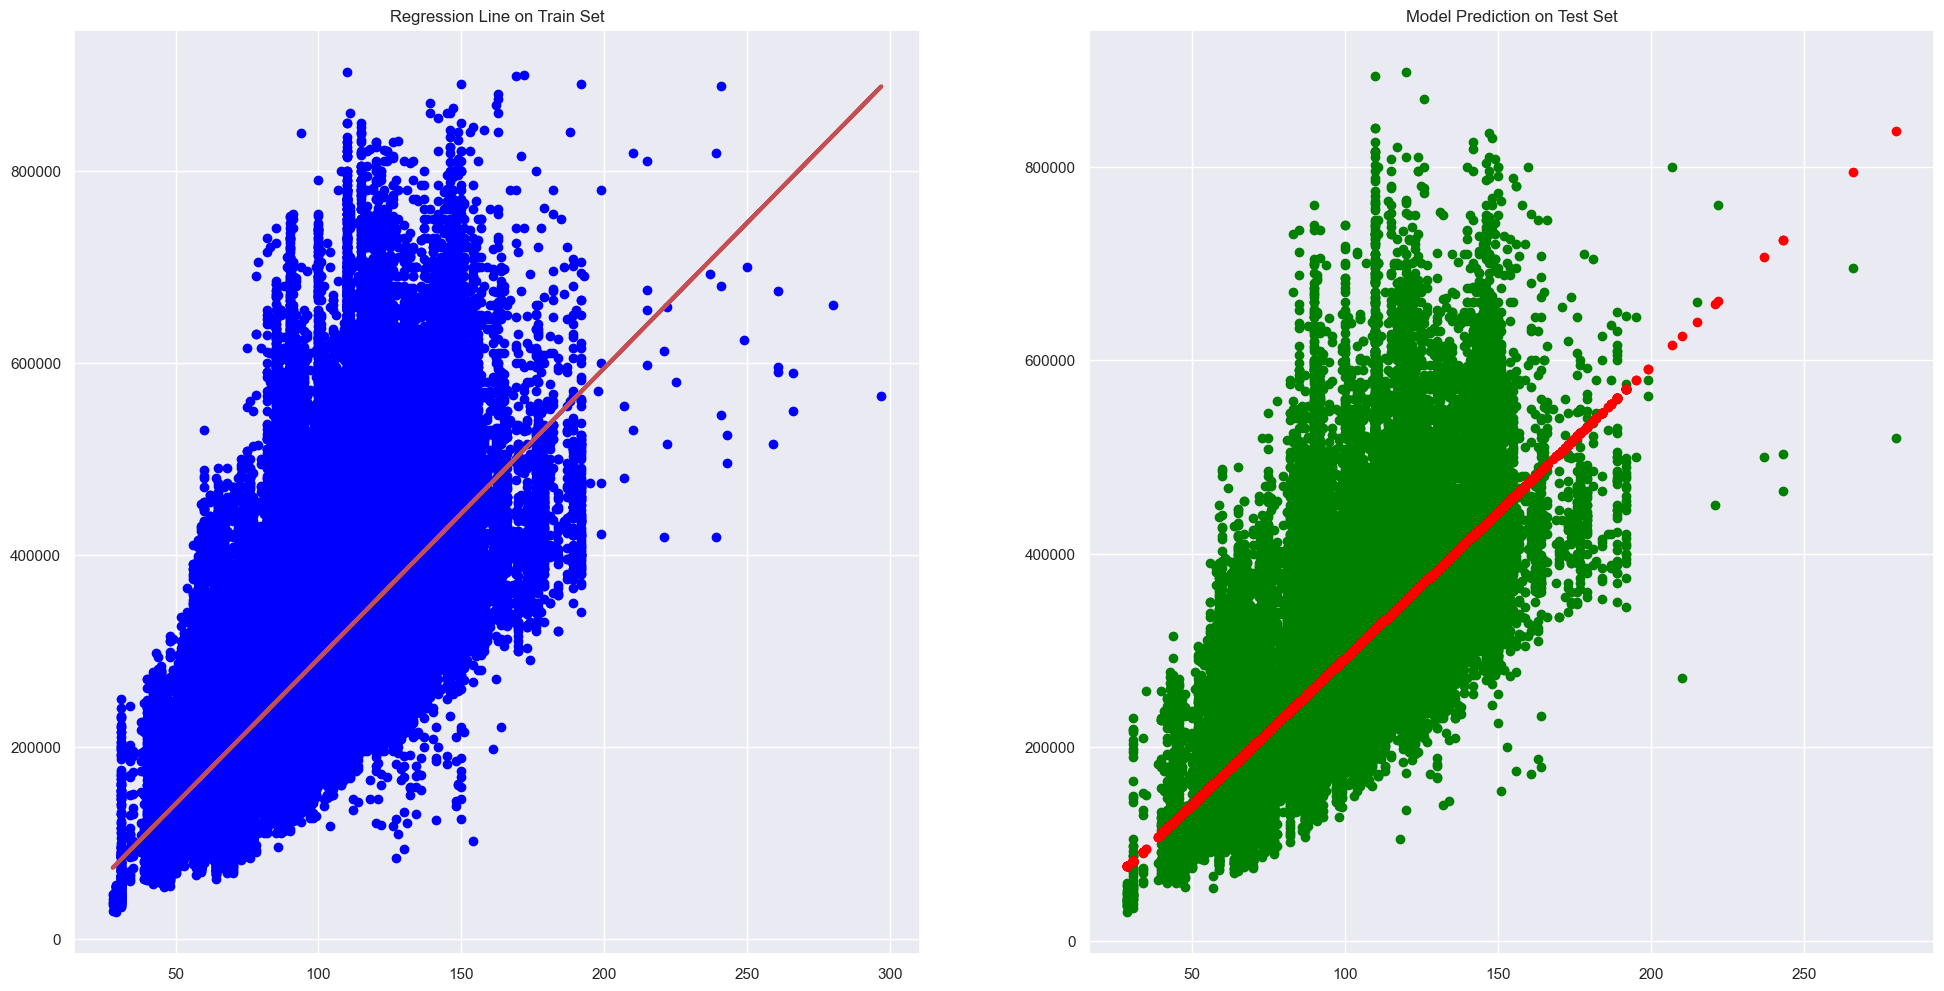

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4762247560729226
Mean Squared Error (MSE) 	: 6589177201.3449745

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4765726121895483
Mean Squared Error (MSE) 	: 6559788461.870943



In [18]:
univariateLinearRegression(Xvar = "floor_area_sqm", yvar = "resale_price", df = NumData) #before removal of outliers

## After removal of outliers

Intercept 	: b =  [-339.93652499]
Coefficients 	: a =  [[2872.38097089]]


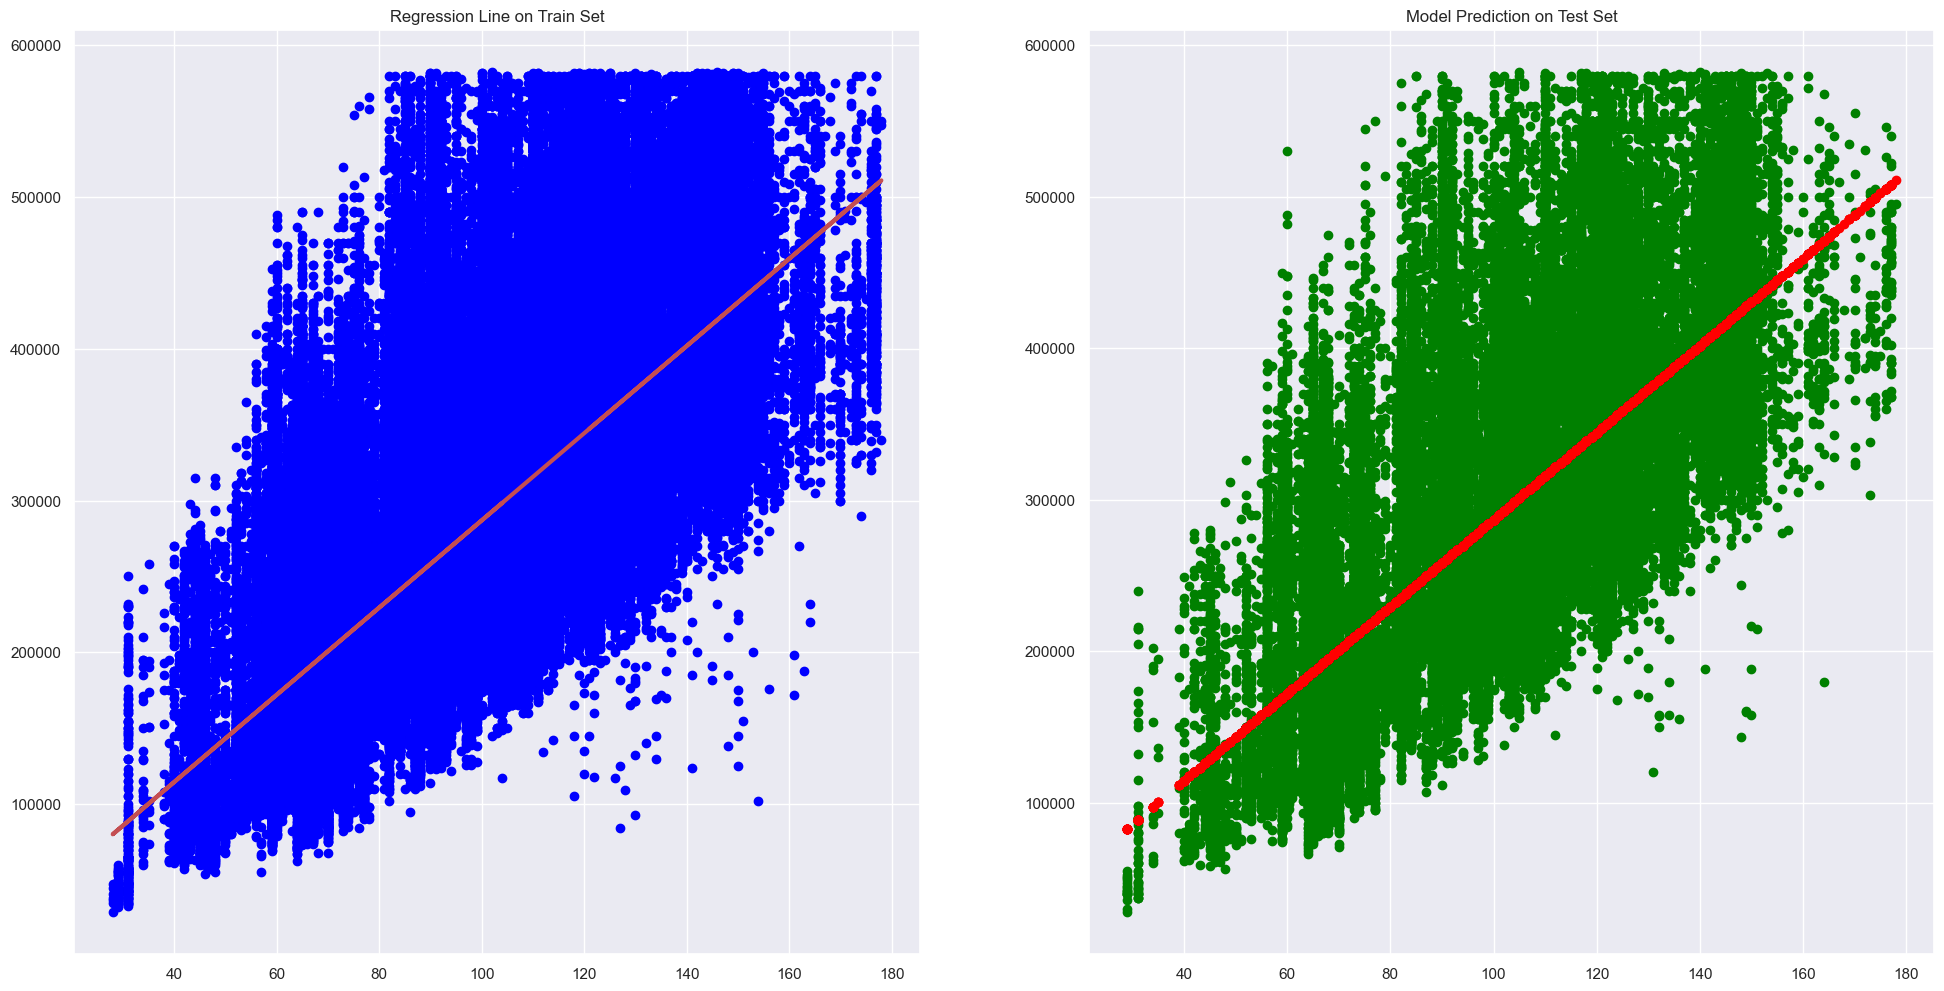

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49223934573412853
Mean Squared Error (MSE) 	: 5383651079.654628

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.49207025730479803
Mean Squared Error (MSE) 	: 5444864319.906575



In [19]:
univariateLinearRegression(Xvar = "floor_area_sqm", yvar = "resale_price", df = NumDataCleaned) #after removal of outliers

After removal of outliers, the model seems to perform better with a higher R^2 and a lower MSE for `floor_area_sqm` and `resale_price`.

## CASE 2 `BEFORE` AND `AFTER` REMOVAL OF OUTLIERS FOR `lease_commence_date` and `resale_price`

## Before removal of outliers

Intercept 	: b =  [-10409168.64235742]
Coefficients 	: a =  [[5377.58401681]]


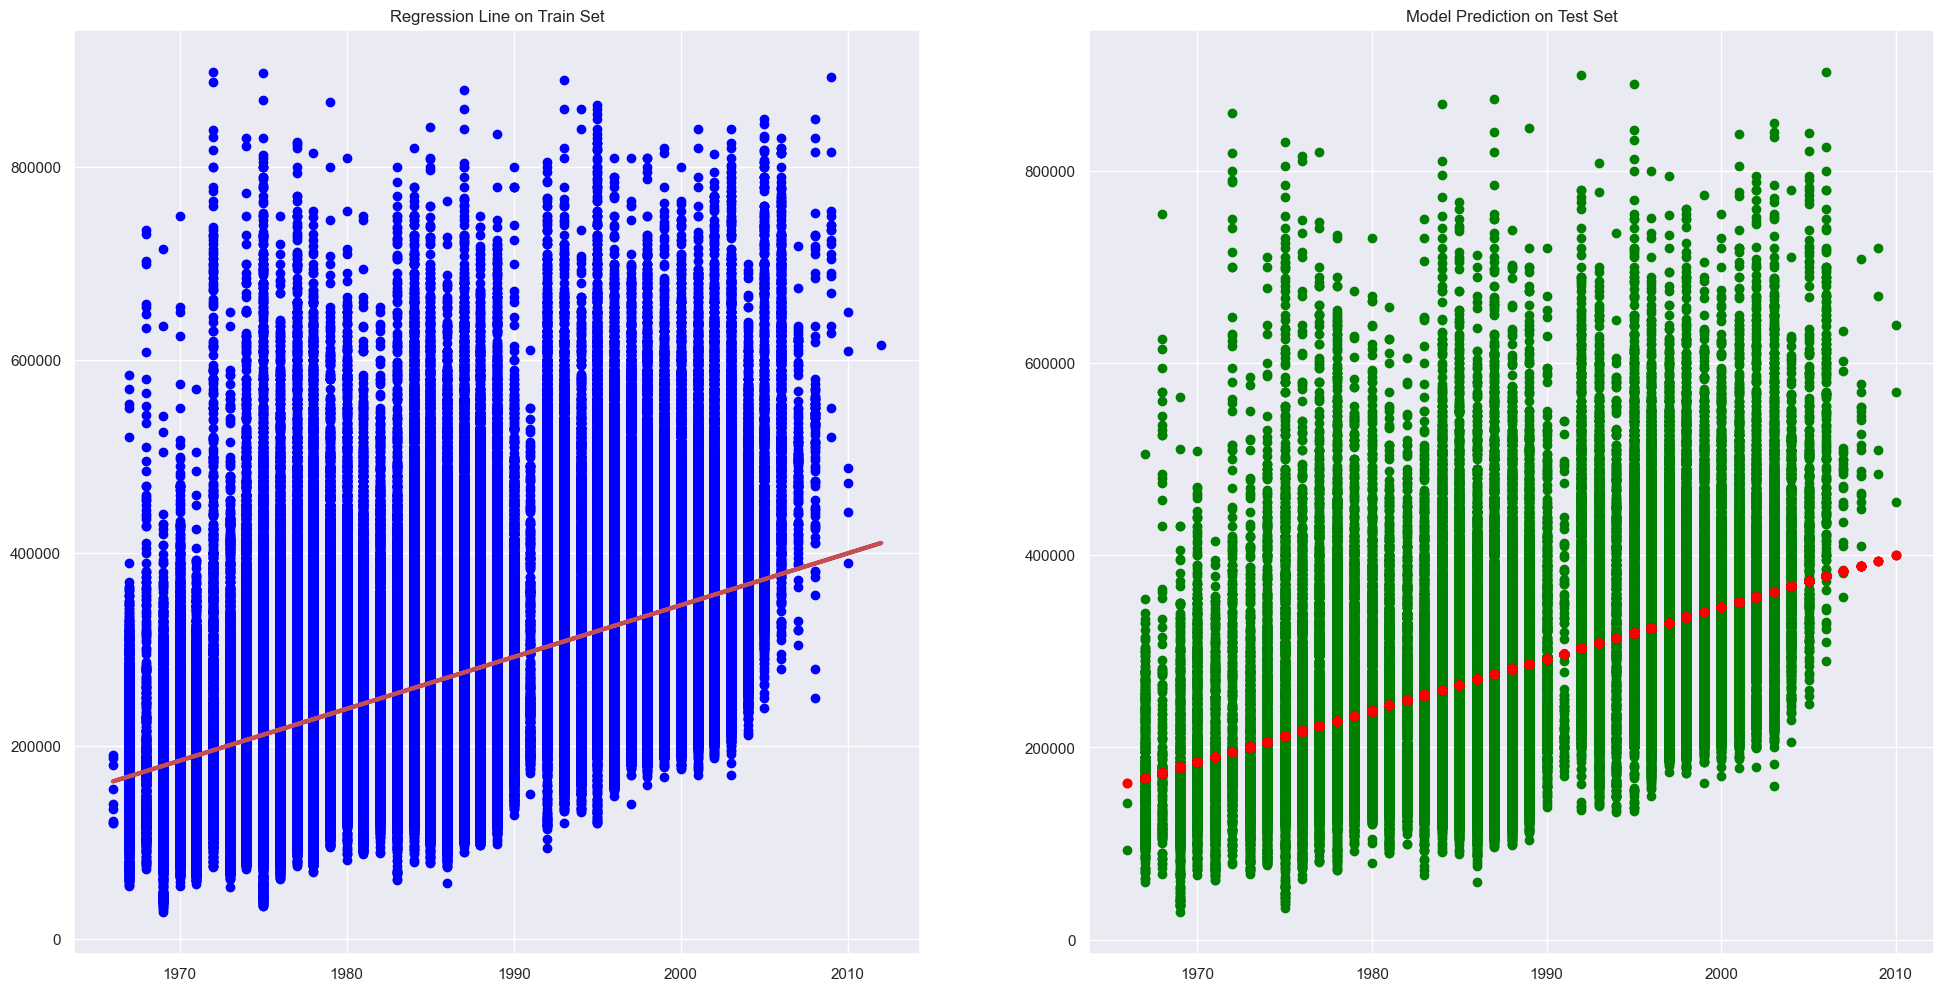

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.190940149051947
Mean Squared Error (MSE) 	: 10187831641.813179

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.19223204139195194
Mean Squared Error (MSE) 	: 10084152415.844664



In [20]:
univariateLinearRegression(Xvar = "lease_commence_date", yvar = "resale_price", df = NumData) #before removal of outliers

## After removal of outliers

Intercept 	: b =  [-9947231.70943749]
Coefficients 	: a =  [[5142.47248241]]


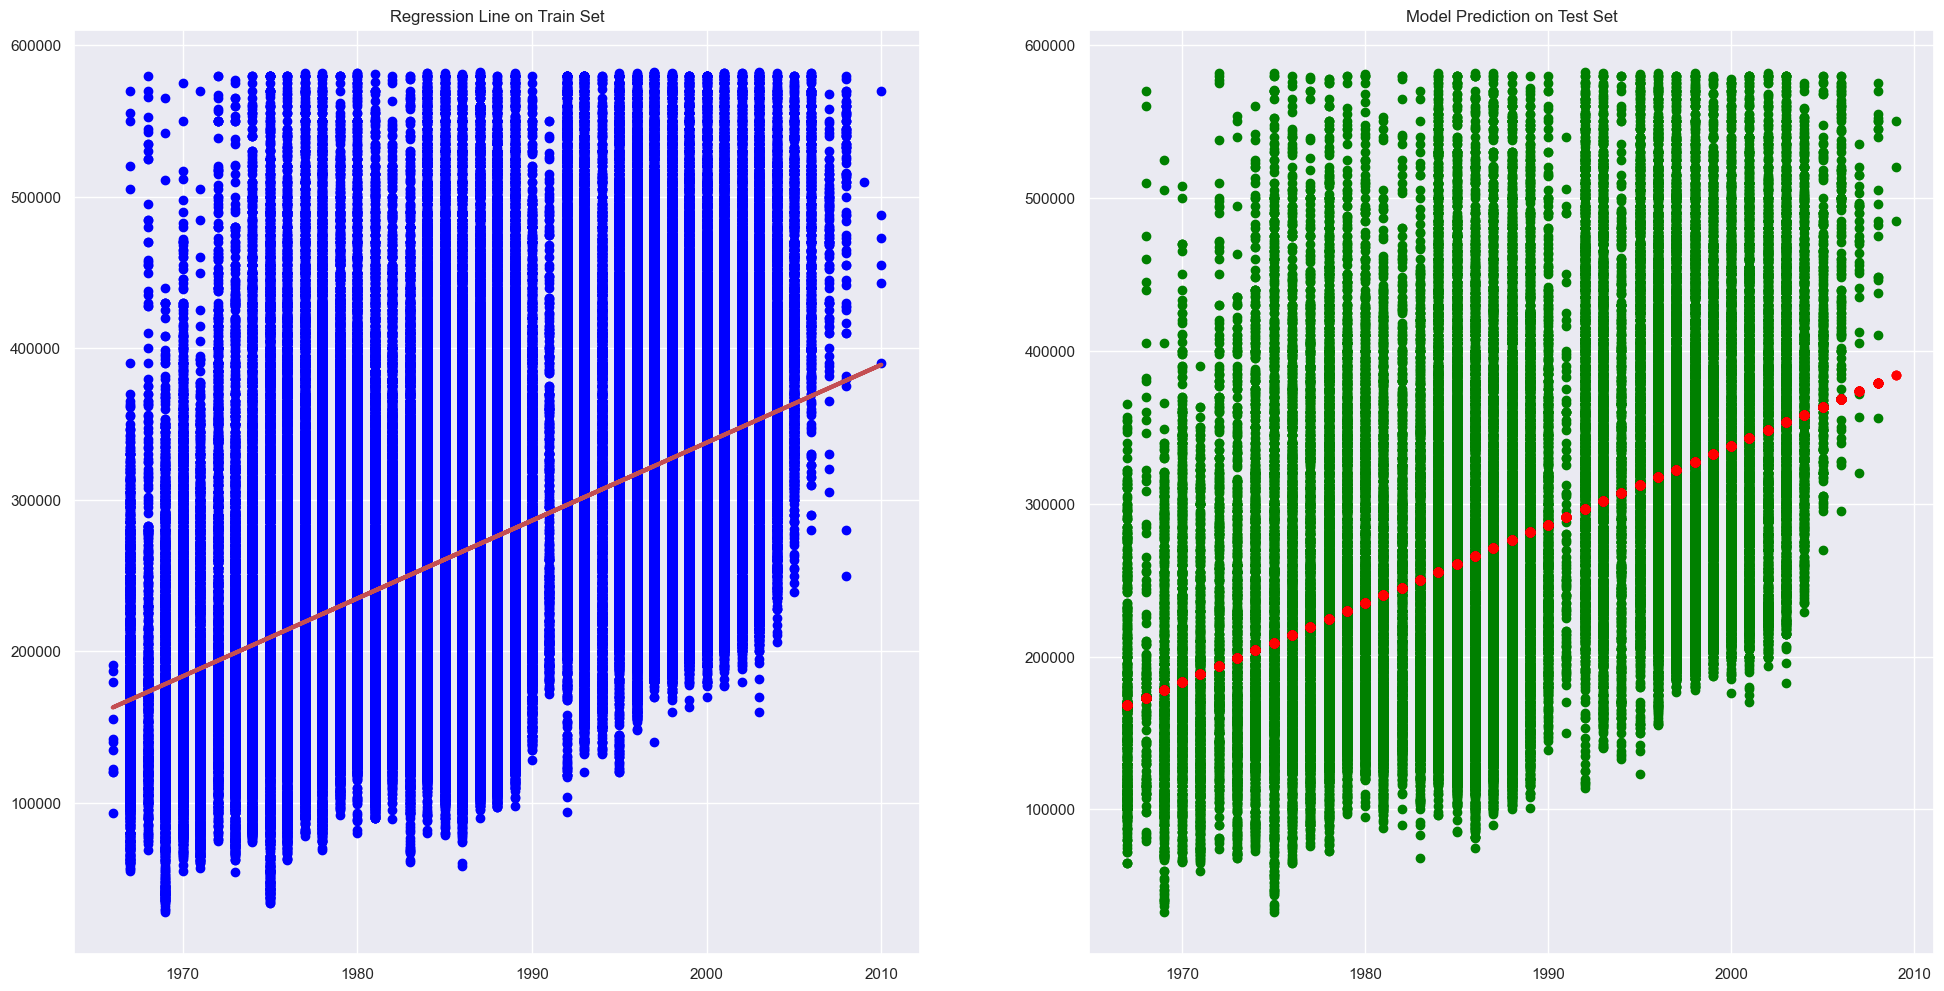

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.20611044271637802
Mean Squared Error (MSE) 	: 8432575067.701783

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.20275819313508003
Mean Squared Error (MSE) 	: 8485368595.085754



In [21]:
univariateLinearRegression(Xvar = "lease_commence_date", yvar = "resale_price", df = NumDataCleaned) #after removal of outliers

After removal of outliers, the model seems to perform better with a higher R^2 and a lower MSE for `lease_commence_date` and `resale_price`.

### Comparing the Uni-Variate Linear Models

Compare and contrast the models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `resale_price` vs `floor_area_sqm` has the best Explained Variance (R^2) out of the two models ~ 0.5 and a lower MSE
* `resale_price` vs `lease_commence_date` have a lower R^2 and a higher MSE
* Naturally, the model with `floor_area_sqm` is the best one in terms of the goodness of fit on Train Set.    


* `resale_price` vs `floor_area_sqm` has the minimum MSE and highest R^2 on both the Train and Test Sets  
* `resale_price` vs `lease_commence_date` have a lower R^2 and higher MSE
* Naturally, the model with `floor_area_sqm` is the best one (lowest MSE) in terms of Test accuracy on the Test Set.    

So, overall, the predictor `floor_area_sqm` is the best amongst the two variables in predicting `resale_price` and also modelling without outliers are performing better, thus we will perform lienar regression only on data without outliers from now onwards.


# Perform Transformation Of Numerical Data

## Check for skewness of predictors

In [22]:
NumDataCleaned.skew() # Without outliers

floor_area_sqm         0.257178
resale_price           0.562052
lease_commence_date   -0.105744
dtype: float64

In [23]:
NumData.skew() #With outliers

floor_area_sqm         0.310634
lease_commence_date   -0.108738
resale_price           0.868381
dtype: float64

Removing outliers has already helped us a lot with the skewness in the data.     
- Skewness between -0.5 to 0.5 is considered more or less *symmetric* (no need to transform)
- Skewness between -1.0 to -0.5 or 0.5 to 1.0 is *moderately skewed* (we may try a transform)
- Skewness below -1.0 or above 1.0 is *highly skewed* (we should try transforming the response)

In this case, we may try fixing the *moderate skewness* of `resale_price` in the cleaned dataset.     
No need to transform `floor_area_sqm` as it has *low skewness* and it is not the response variable.

In [24]:
# Make a new column for the transformed response variable
# Go ahead and try out a couple of different transforms
NumDataCleaned['logresalePrice'] = np.log(NumDataCleaned['resale_price'])
NumDataCleaned['sqrtresalePrice'] = np.sqrt(NumDataCleaned['resale_price'])

In [25]:
NumDataCleaned.skew()

floor_area_sqm         0.257178
resale_price           0.562052
lease_commence_date   -0.105744
logresalePrice        -0.256347
sqrtresalePrice        0.176969
dtype: float64

Both the transformations reduced skewness to the acceptable margin (-0.5 to 0.5).     
I will use `sqrtresalePrice` for the fit.

# Checking the effect of transformation, whether linnear regression model will be improved

## Univariate regression on transformed dataframes

`floor_area_sqm` vs `sqrtresalePrice`

Intercept 	: b =  [248.5746742]
Coefficients 	: a =  [[2.78206318]]


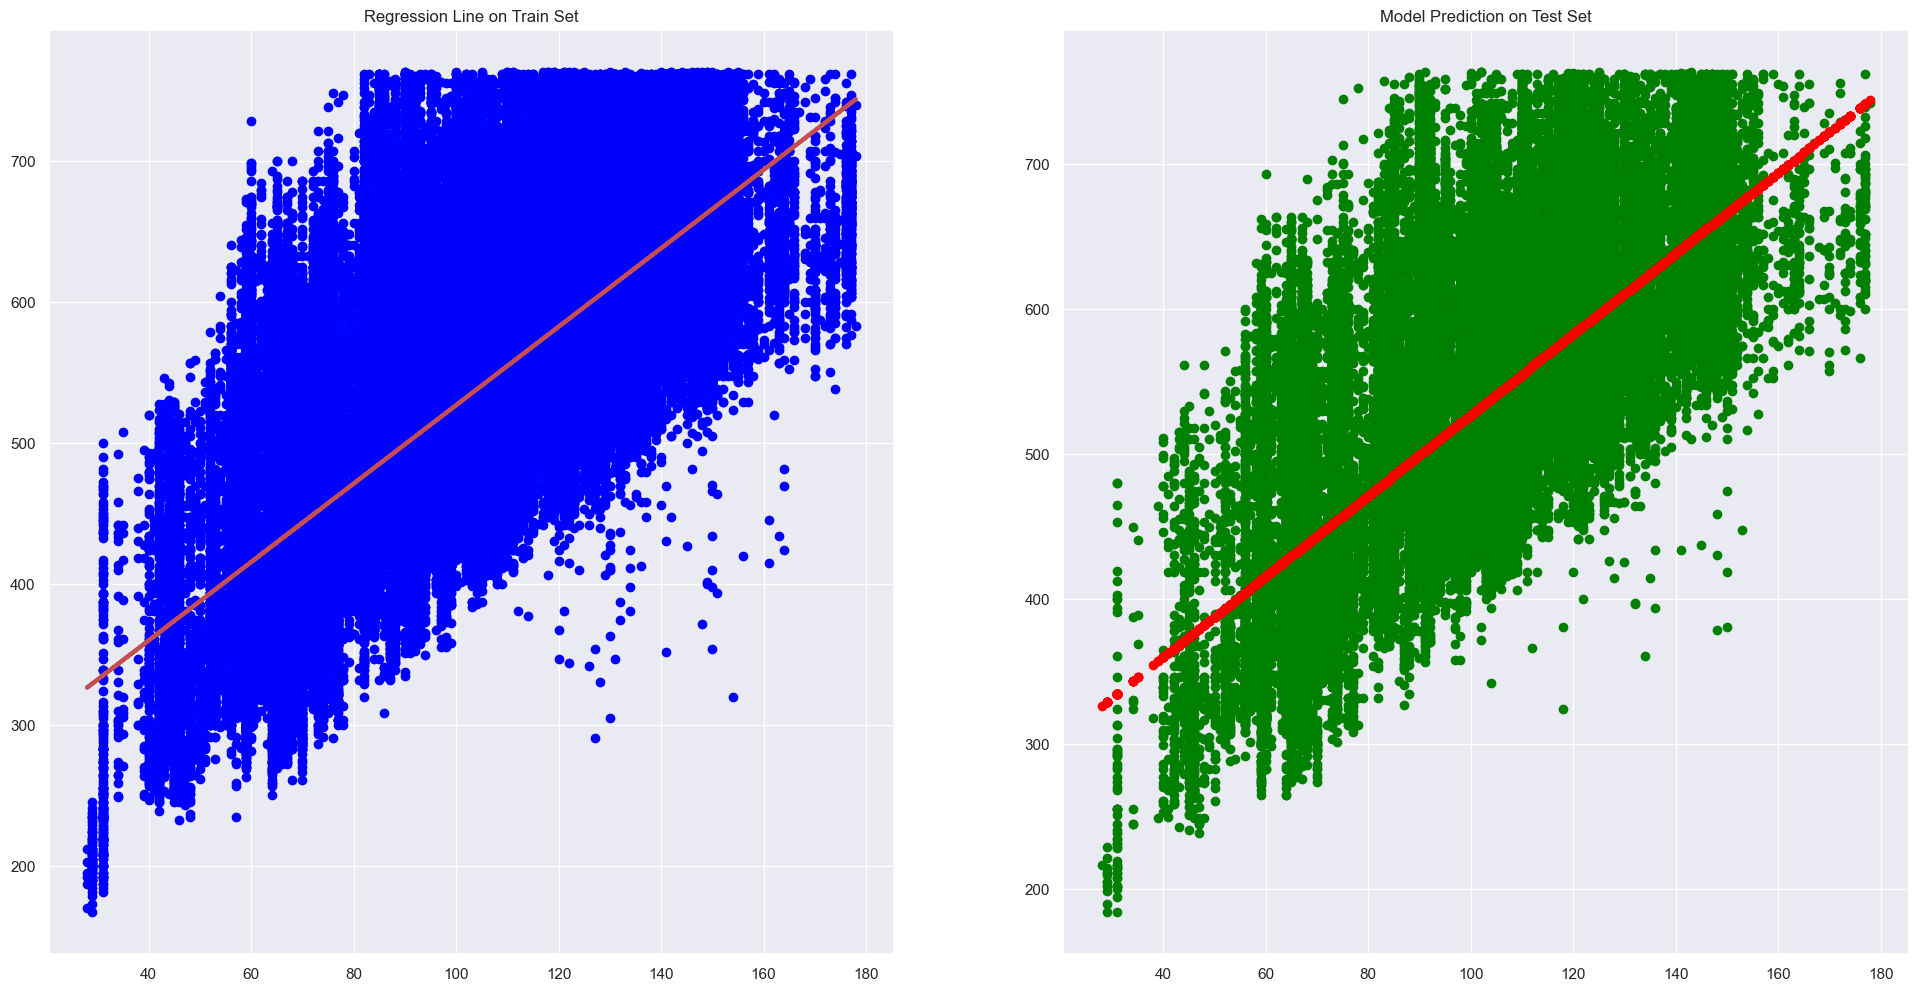

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5138841741883686
Mean Squared Error (MSE) 	: 4636.823057078544

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5086986090832053
Mean Squared Error (MSE) 	: 4702.203671631382



In [26]:
univariateLinearRegression(Xvar = "floor_area_sqm", yvar = "sqrtresalePrice", df =NumDataCleaned)

`lease_commence_date` vs `sqrtresalePrice`

Intercept 	: b =  [-9569.08351516]
Coefficients 	: a =  [[5.07308354]]


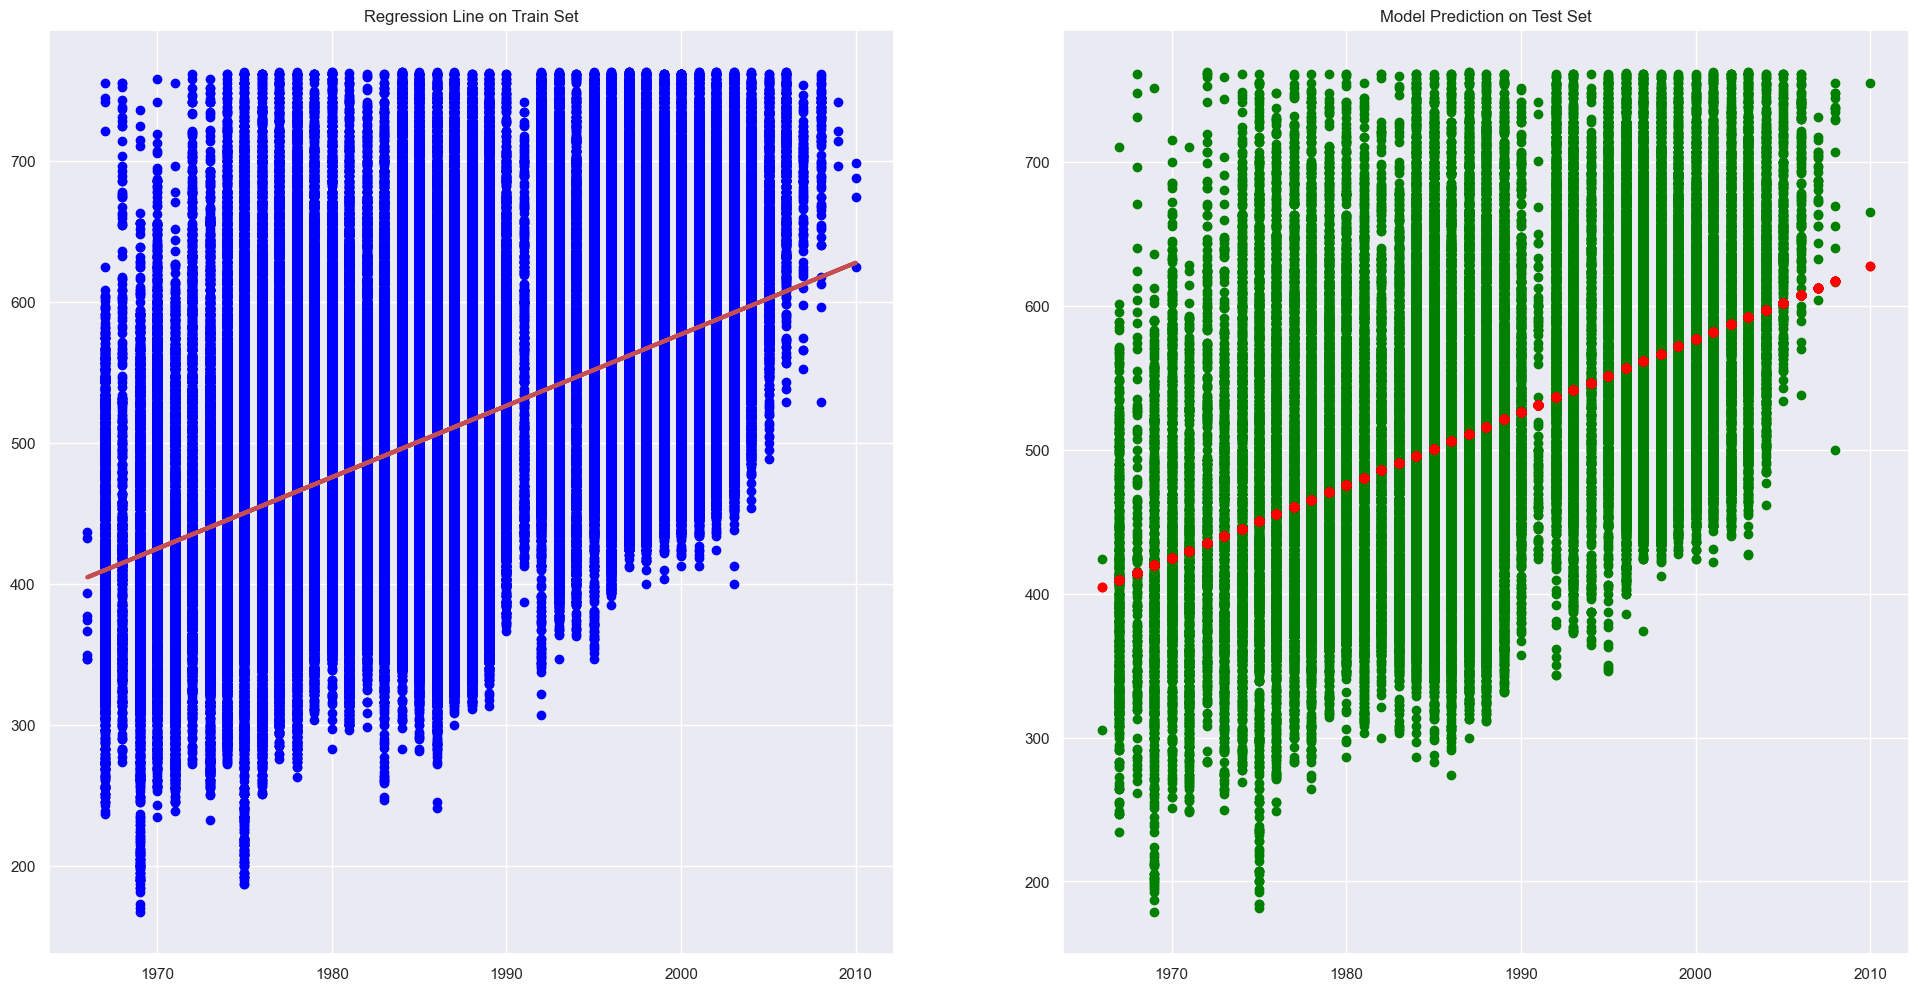

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.22305903994224896
Mean Squared Error (MSE) 	: 7409.651954006409

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2244306745250596
Mean Squared Error (MSE) 	: 7427.8648214669665



In [27]:
univariateLinearRegression(Xvar = "lease_commence_date", yvar = "sqrtresalePrice", df = NumDataCleaned)

**R^2 seems to be same once again, while the MSE seems to have improved (reduced) a lot**<br>
**Transform did help the MSE to some extent. However, R^2 did not change too much, indicating that VAR($y$) must have reduced on a similar scale.**

## Thus, we will not use transformation for the rest of our analysis.

# We want to compare and see whether a multivariate model will be better than a Univariate

## Multivariate Regression For Numerical Data
`floor_area_sqm` and `lease-commence-date`

## With Outliers

In [34]:
# Extract Response and Predictors
y = pd.DataFrame(NumData['resale_price'])
X = pd.DataFrame(NumData[['floor_area_sqm','lease_commence_date']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (295720, 2) (295720, 1)
Test Set  : (73931, 2) (73931, 1)


LinearRegression()

In [35]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-1859251.43610116]
Coefficients 	: a =  [[2831.73023994  939.06349992]]


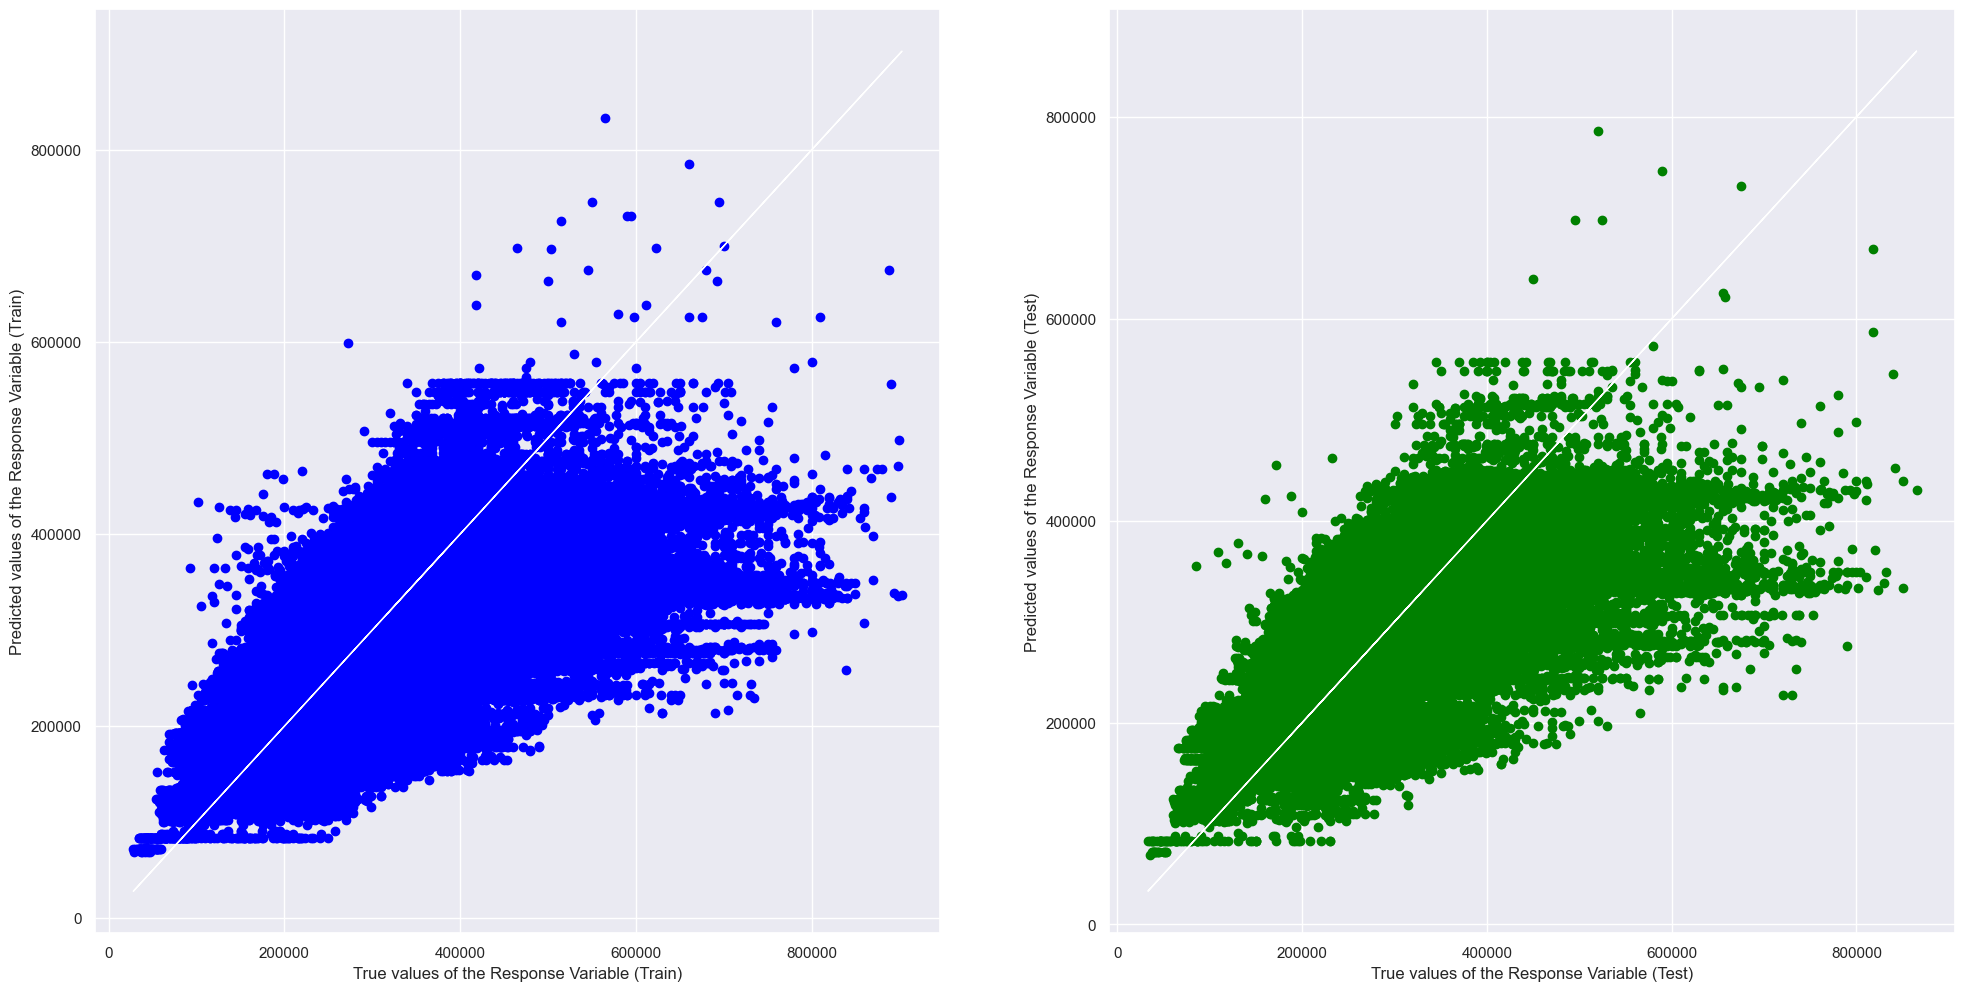

In [36]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [37]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.4798254448259671
Mean Squared Error (MSE) on Train Set 	: 6520337632.277026
Mean Squared Error (MSE) on Test Set 	: 6579756575.293562


## Without Outliers

In [38]:
# Extract Response and Predictors
y = pd.DataFrame(NumDataCleaned['resale_price'])
X = pd.DataFrame(NumDataCleaned[['floor_area_sqm','lease_commence_date']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (290968, 2) (290968, 1)
Test Set  : (72743, 2) (72743, 1)


LinearRegression()

In [39]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-1790221.87587904]
Coefficients 	: a =  [[2689.51277467  909.26065293]]


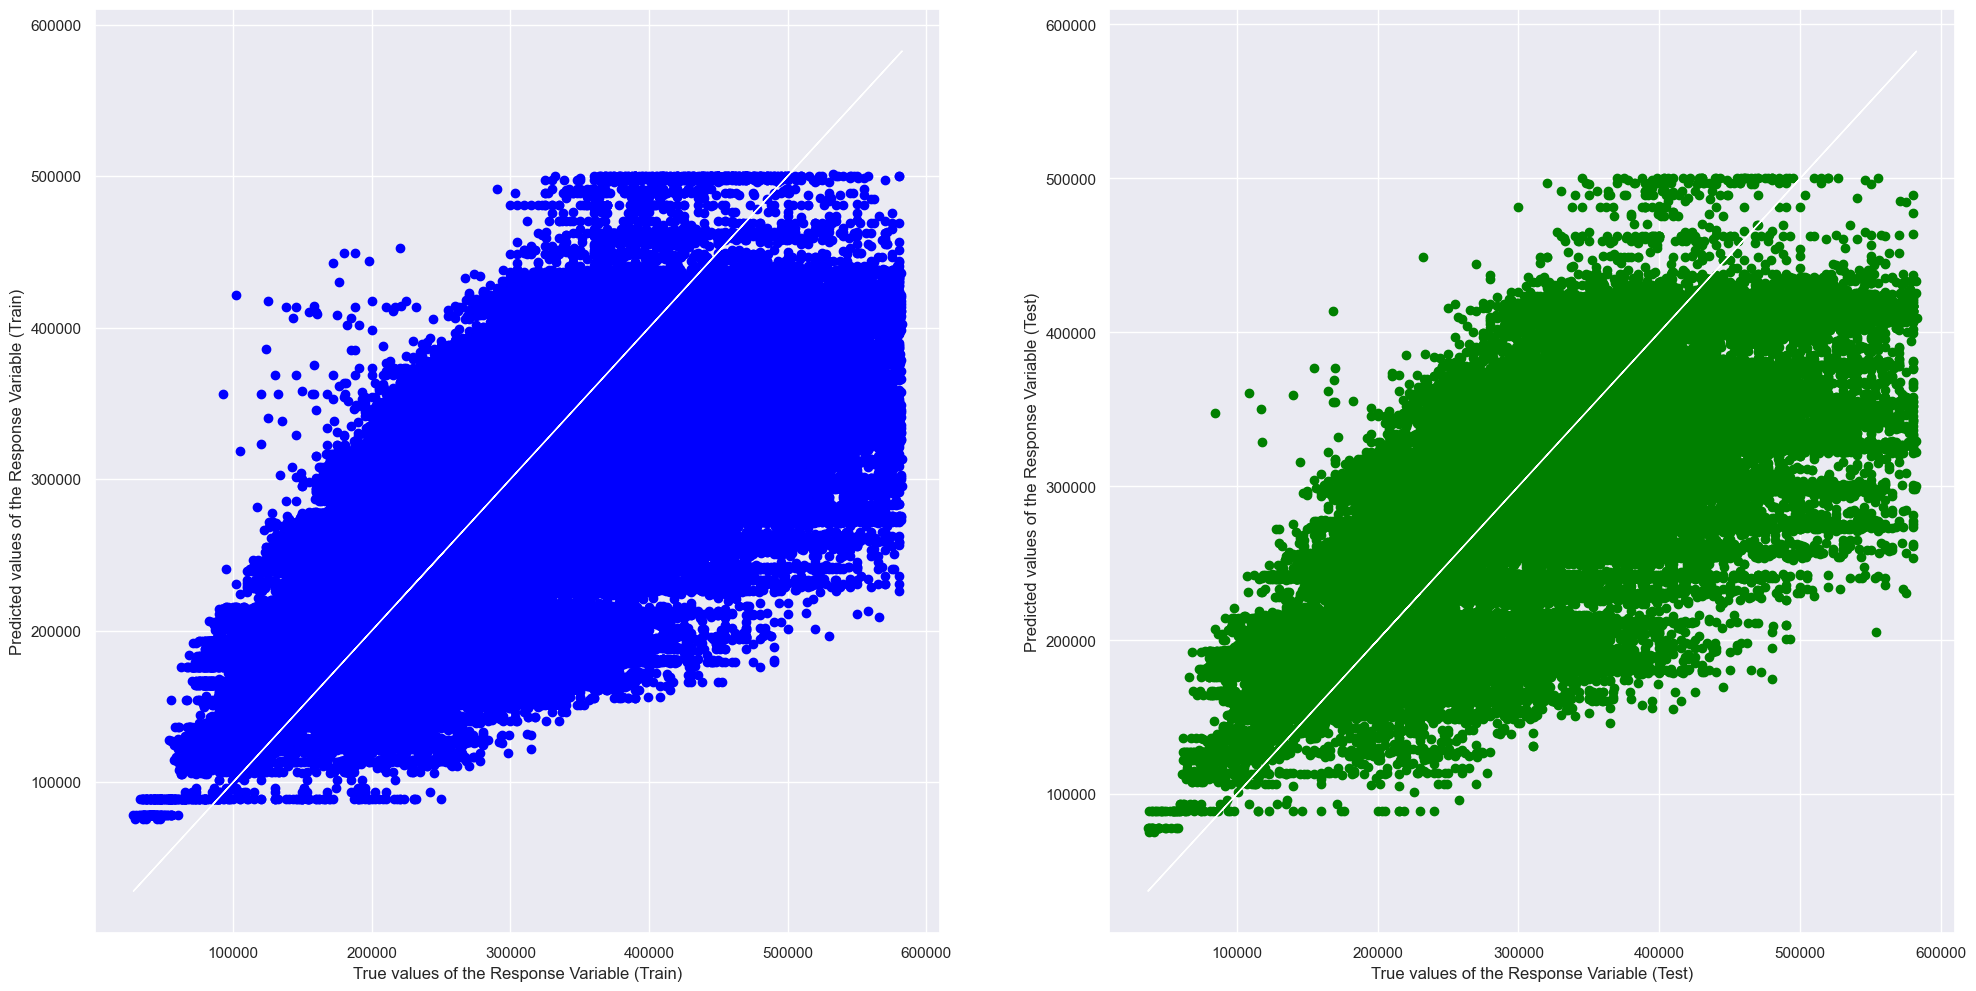

In [31]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [32]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.49744028164334875
Mean Squared Error (MSE) on Train Set 	: 5340776769.409636
Mean Squared Error (MSE) on Test Set 	: 5389549279.413282


## From the Univariate models, we concluded that the model measuring `resale_price using floor_area_sqm is the best model` compared to floor_area_sqm with outliers or both models of lease_commence_date, due to having the highest explained variance and lowest MSE.

## From the Multivariate models, we concluded that the model without outliers is better than the model with outliers due to lower MSE with similar explained variance.

## Thus, we decided to `compare the Univariate floor_area_sqm without outliers` model vs the `Multivariate without outliers model`, and saw that that there was `little to no difference` in both explained variance and MSE.

## Thus, we can conclude that `lease_commence_date has little to no effect on resale_price` and `floor_area_sqm is the only useful numerical data` for measuring resale_price.

# Analysis Of Categorical Data Without Outliers

In [41]:
CatDataCleaned

,flat_type_num,Story_range_num,flat_model_num,resale_price
0,3,8,4,147000.0
1,3,5,4,144000.0
2,3,8,11,159000.0
3,3,8,11,167000.0
4,3,8,11,163000.0
...,...,...,...,...
369646,5,11,4,476888.0
369647,5,2,4,490000.0
369648,5,2,4,488000.0
369649,6,8,3,705000.0


## REGRESSION FOR CATEGORICAL DATA

`flat_type_num` vs `resale_price`

Intercept 	: b =  [-43957.32469371]
Coefficients 	: a =  [[79354.09915148]]


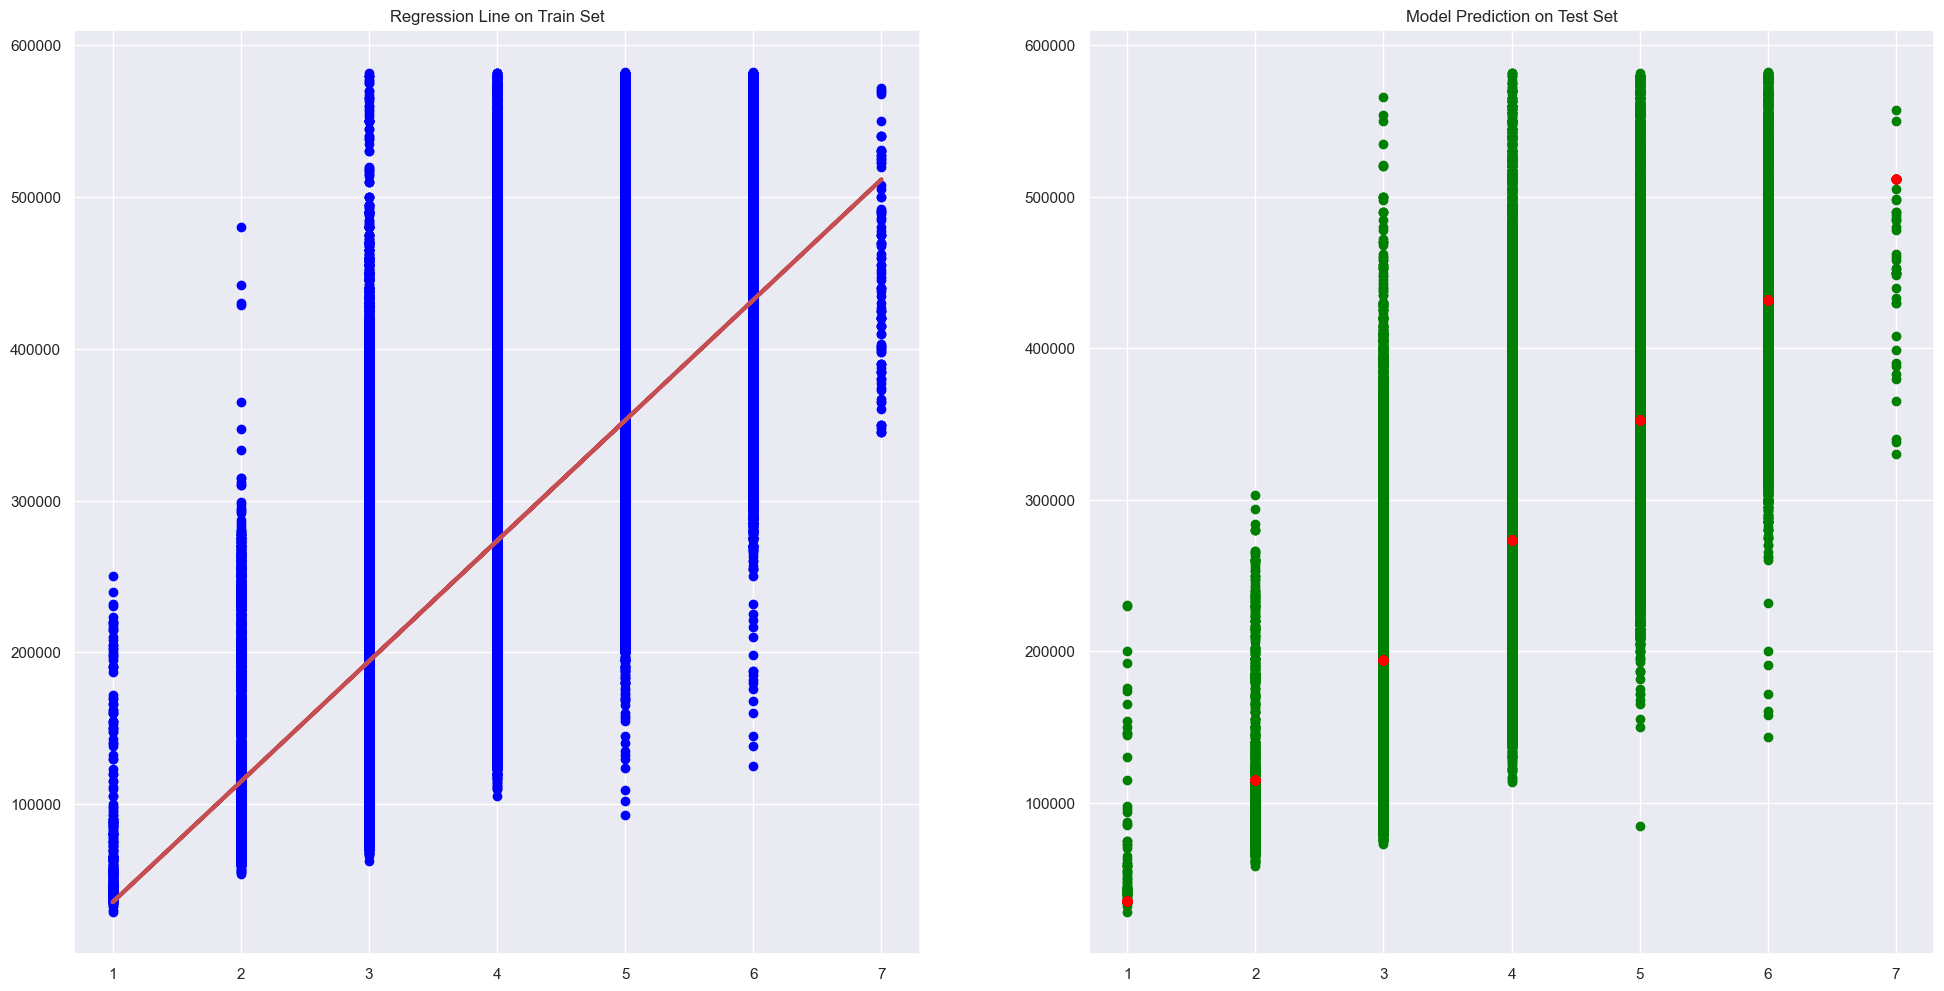

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5142979305943475
Mean Squared Error (MSE) 	: 5099536068.1023445

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.523080973698439
Mean Squared Error (MSE) 	: 5044451530.301202



In [45]:
univariateLinearRegression(Xvar = "flat_type_num", yvar = "resale_price", df = CatDataCleaned) #Without Outliers

`Story_range_num` vs `resale_price`

Intercept 	: b =  [246791.45888982]
Coefficients 	: a =  [[3828.81389921]]


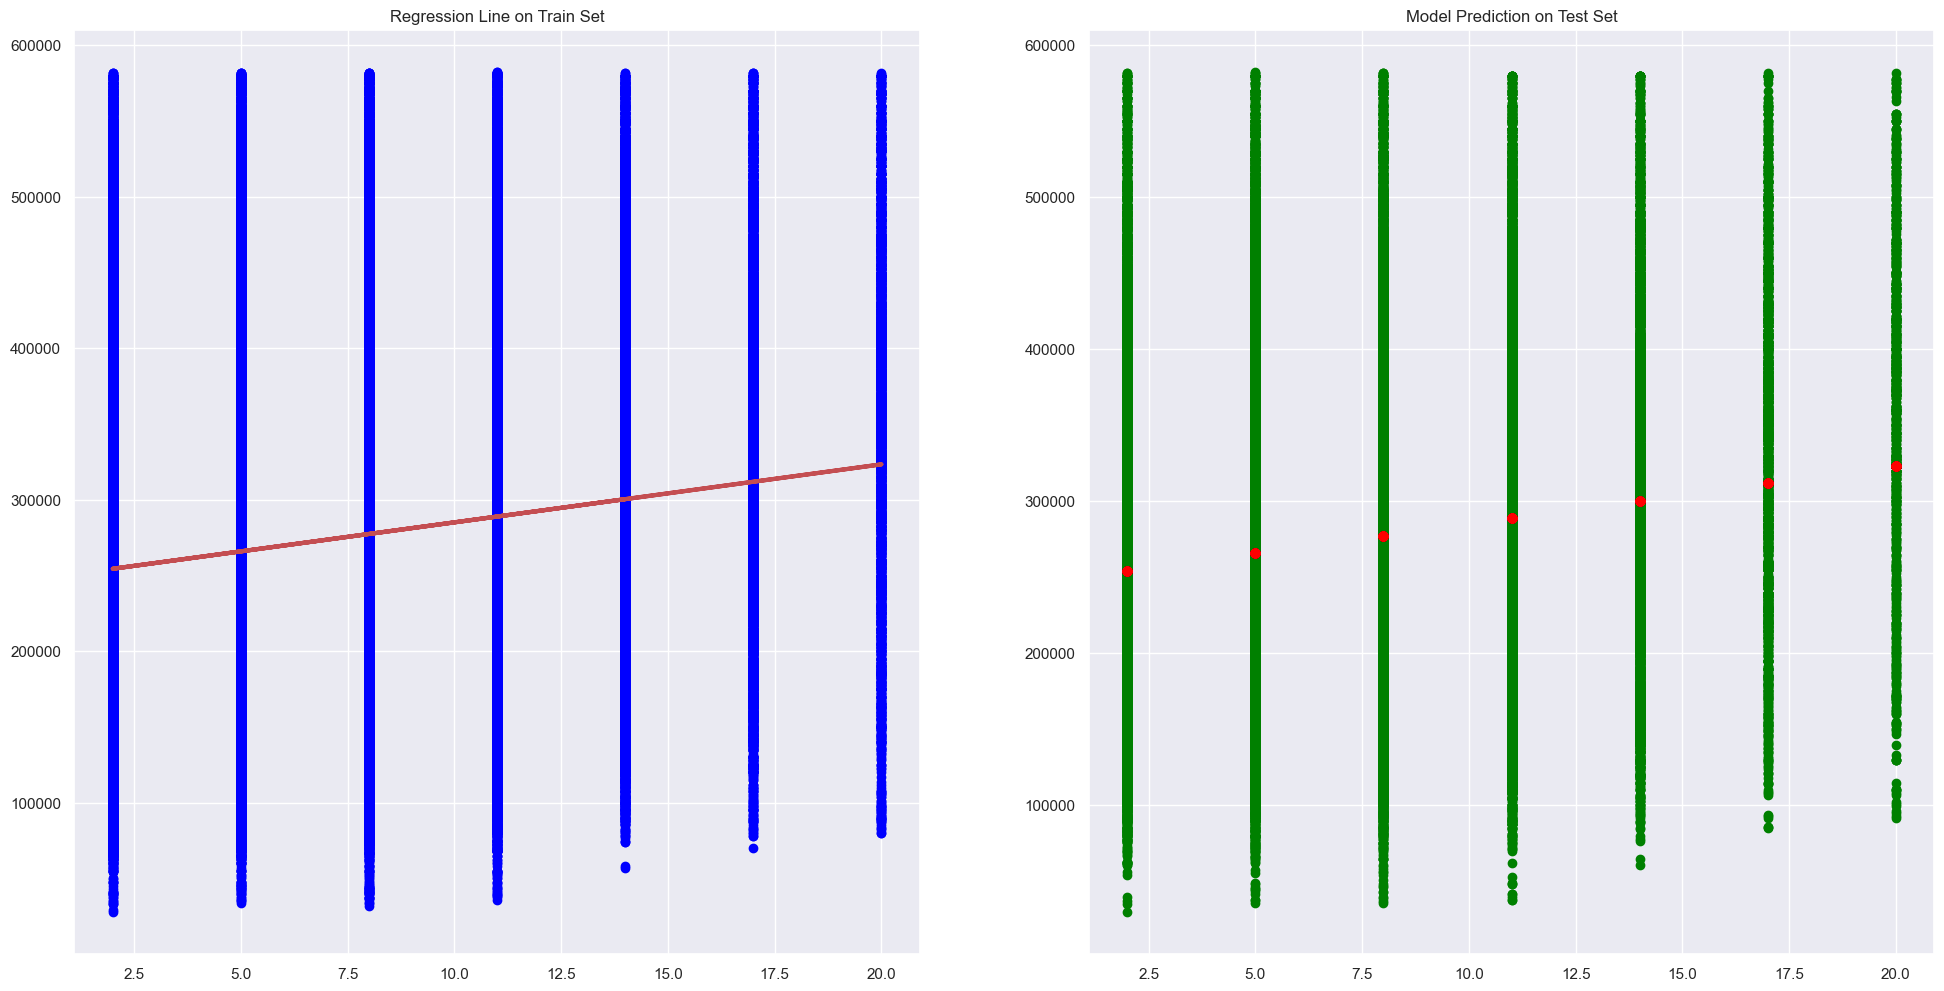

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.023671779200613363
Mean Squared Error (MSE) 	: 10266295447.584576

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.02320081316642353
Mean Squared Error (MSE) 	: 10269621762.54781



In [46]:
univariateLinearRegression(Xvar = "Story_range_num", yvar = "resale_price", df = CatDataCleaned) #Without Outliers

`flat_model_num` vs `resale_price`

Intercept 	: b =  [346578.87229996]
Coefficients 	: a =  [[-9141.06509725]]


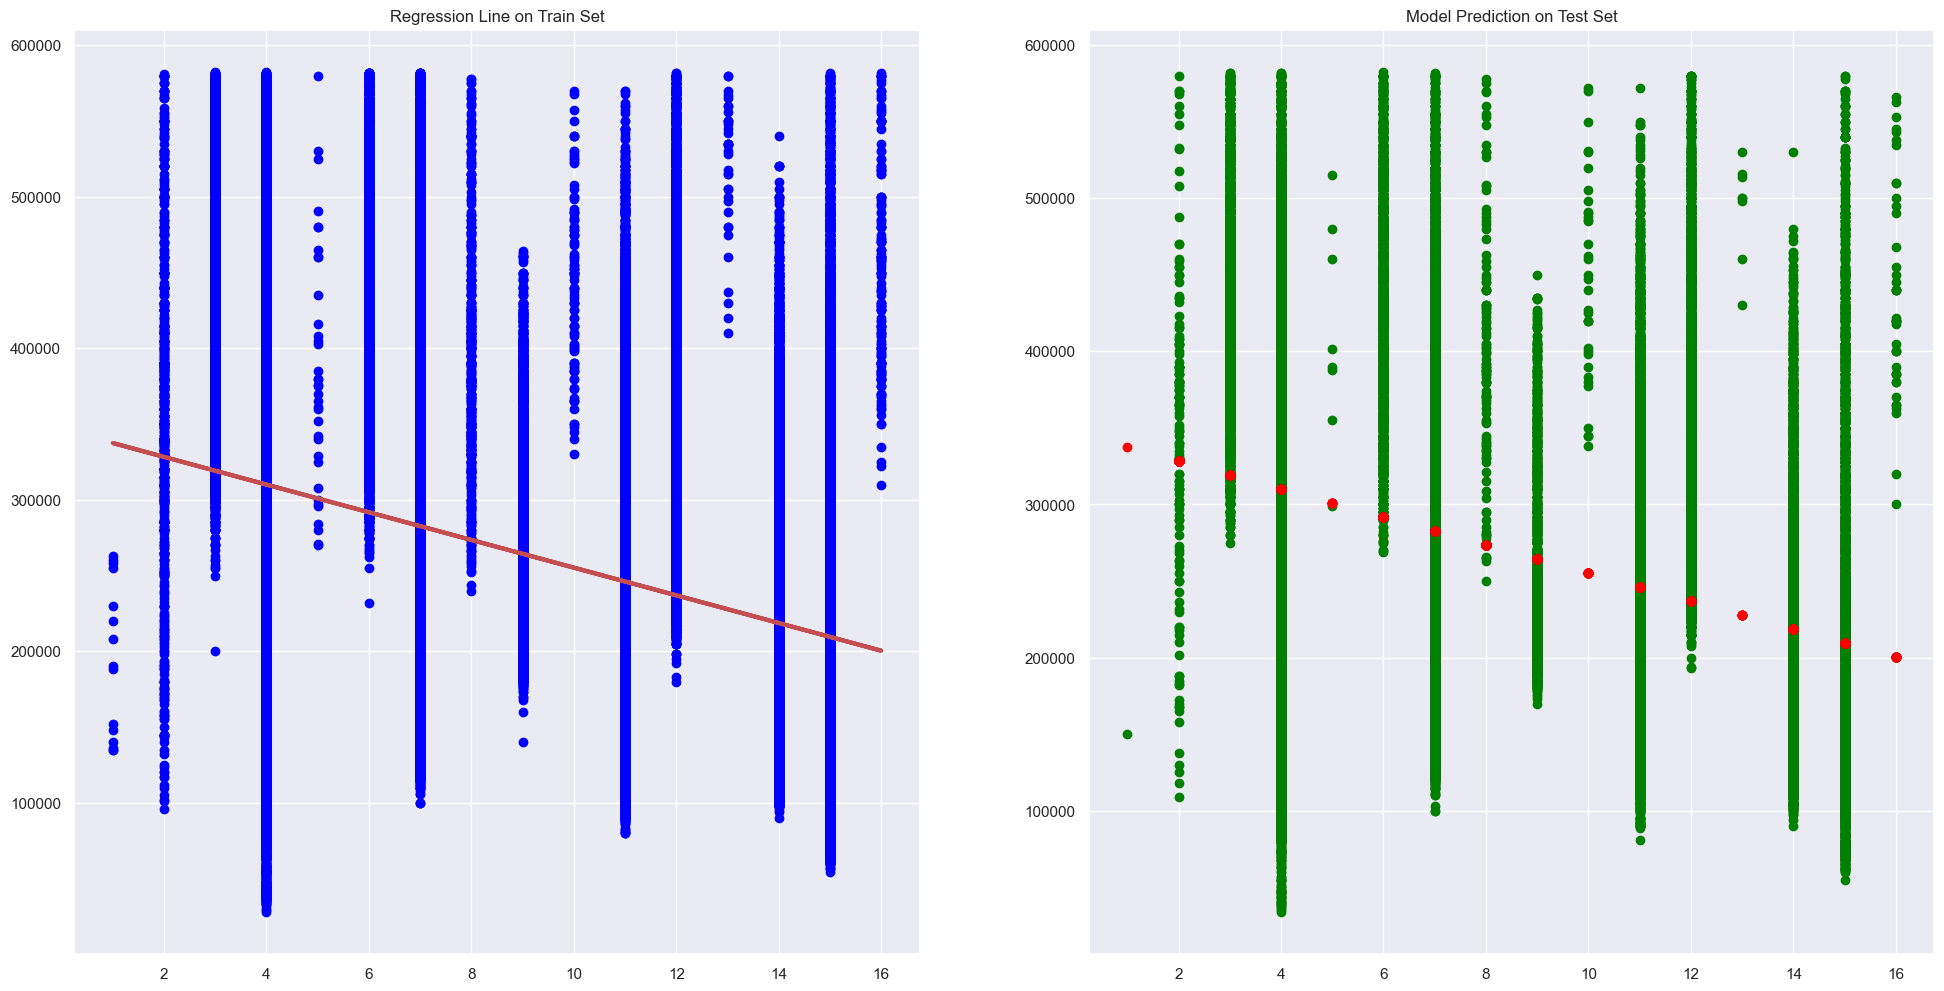

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.10146727088155783
Mean Squared Error (MSE) 	: 9449392168.536224

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.10130647367118106
Mean Squared Error (MSE) 	: 9443943301.83947



In [47]:
univariateLinearRegression(Xvar = "flat_model_num", yvar = "resale_price", df = CatDataCleaned) #Without Outliers

### Comparing the Uni-Variate Linear Models

Compare and contrast the models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `resale_price` vs `flat_type_num` has the best Explained Variance (R^2) out of the two models ~ 0.5 and a lower MSE
* `resale_price` vs `Story_range_num` and `resale_price` vs `flat_model_num` have a very lower R^2 and a higher MSE
* Naturally, the model with `flat_type_num` is the best one in terms of the goodness of fit on Train Set.    


* `resale_price` vs `flat_type_num` has the minimum MSE and highest R^2 on both the Train and Test Sets

* Naturally, the model with `flat_type_num` is the best one (lowest MSE) in terms of Test accuracy on the Test Set.    

So, overall, the predictor `flat_type_num` is the best amongst the categorical variables in predicting `resale_price`.      


**From our analysis, `floor_area_sqm` is the best for numerical predictors and `flat_type_num` is the best for categorical predictors**<br>
**To further evaluate our claim, we will analyze from additional machine learning models `Gradient Boosting` , `Lasso Regression` , `Random Forest` and `Neural Network`.**